In [1]:
#EMA filter

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

y_prev = 0;
def EMAFilter(x, alpha, y_prev):
    return alpha * x + (1-alpha)*y_prev


def EMAFilterResponse(alpha):
    b = [alpha] #nominator
    a = [1, -1+alpha] #denominator
    return b,a

def FindNearest(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()

def FindAlpha(fs, fcut):
    x = np.cos(2*np.pi*fcut/fs)
    return -np.sqrt(x**2-4*x+3) + x -1, np.sqrt(x**2-4*x+3) + x -1
     


In [49]:
f_sampling = 160
f_cutoff = 5

alpha = max(FindAlpha(f_sampling, f_cutoff))
b,a = EMAFilterResponse(alpha)

w, h = signal.freqz(b,a,fs=f_sampling)
h = 20 * np.log10(abs(h))
idx = FindNearest(h, -3)
print("cutoff freq = " + str(w[idx]))


print(FindAlpha(f_sampling, f_cutoff))

cutoff freq = 5.0
(-0.21618843521060915, 0.17775899601707001)


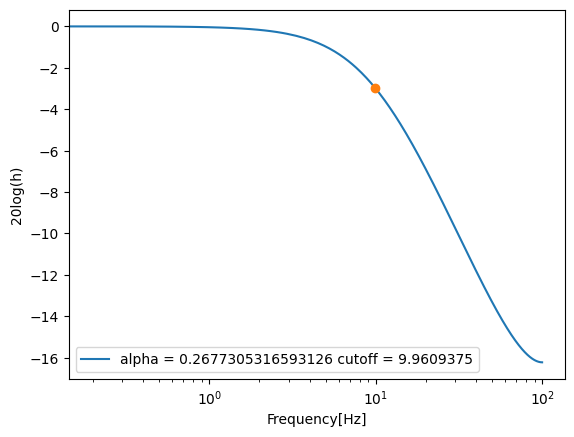

In [3]:
plt.semilogx(w, h, label="alpha = "+ str(alpha) +" cutoff = " + str(w[idx]))
plt.plot(w[idx], h[idx],'o')
plt.xlabel('Frequency[Hz]')
plt.ylabel('20log(h)')
plt.legend()

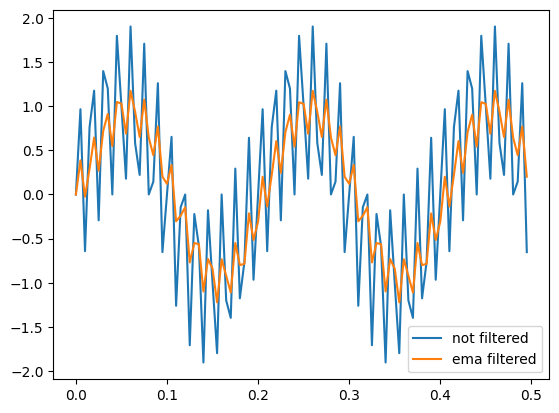

In [41]:
fs = 200
dt = 1/fs
t = np.arange(0, 0.5, dt)
x = np.sin(2*np.pi*70*t) + np.sin(2*np.pi*5*t)

y_prev = 0; y = []
for i in range(len(t)):
    y.append(EMAFilter(x[i],0.4,y_prev))
    y_prev = y[i]

plt.plot(t,x, label="not filtered")
plt.plot(t,y, label="ema filtered")
plt.legend()

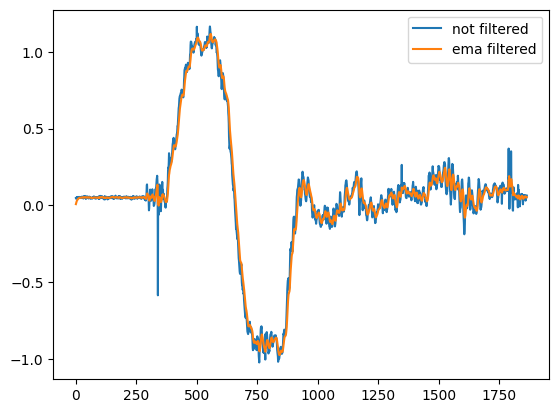

In [52]:
import pandas as pd

df = pd.read_csv('../../sample0')
df.dropna()

x = df['acc0']
y_prev = 0; y = []
for i in range(len(x)):
    y.append(EMAFilter(x[i],0.17,y_prev))
    y_prev = y[i]


plt.plot(x, label="not filtered")
plt.plot(y, label="ema filtered")
plt.legend()